# EDA on IMDB dataset

#### What is EDA?

---
`Exploratory Data Analysis (EDA)` refers to the critical process of performing initial investigations on data to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

---
IMDB is a popular website for rating films and series. We always go there if we want to watch something new, and many users trust its rankings. The data is about the most famous 6k+ Films and series on IMDB with rates. The Data is Perfect for Exploratory Data Analysis. We can get this data from [Kaggle](https://www.kaggle.com/mazenramadan/imdb-most-popular-films-and-series). 

---
Now we will do EDA to find answers to some interesting questions. For that we will import Pandas and NumPy for data storage and processing, and for visualization, we use Matplotlib and Seaborn.

---


## Understand the Dataset

The dataset have 6178 rows and 14 columns. Column description given below.


* Name: Name of the film/series
* Data: Creation date
* Rate: IMDB's Rating for the movie / series
* Votes: Number of voters
* Genre: Genres , Actions , Drama, Romance, etc…
* Duration: Duration of the episode , film
* Type: whether it's film or series
* Certificate:
        TV-Y: Designed to be appropriate for all children
        TV-Y7: Suitable for ages 7 and up
        G: Suitable for General Audiences
        TV-G: Suitable for General Audiences
        PG: Parental Guidance suggested
        TV-PG: Parental Guidance suggested
        PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.
        TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.
        R: Restricted. May be inappropriate for ages 17 and under.
        TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.
        NC-17: Inappropriate for ages 17 and under
* Episodes: Number of Episodes only for series
* Nudity, Violence, Profanity, Alcohol, and Frightening :How much does it have of these

## Data Preparation and Cleaning

Data Cleaning is an important step and time-consuming step in data analysis. Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling mistakes, and so on could all be present. These challenges could make data analysis complex. Here we will address some of those.


In [1]:
#import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [2]:
#load dataset
IMDB_df = pd.read_csv('imdb.csv')
IMDB_df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


In [3]:
IMDB_df.shape

(6178, 14)

In [4]:
IMDB_df.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate


In [5]:
IMDB_df.columns

Index(['Name', 'Date', 'Rate', 'Votes', 'Genre', 'Duration', 'Type',
       'Certificate', 'Episodes', 'Nudity', 'Violence', 'Profanity', 'Alcohol',
       'Frightening'],
      dtype='object')

In [6]:
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         6178 non-null   object 
 3   Votes        6178 non-null   object 
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  5728 non-null   object 
 8   Episodes     6178 non-null   object 
 9   Nudity       4719 non-null   object 
 10  Violence     5504 non-null   object 
 11  Profanity    5520 non-null   object 
 12  Alcohol      5407 non-null   object 
 13  Frightening  5320 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 675.8+ KB


In [7]:
'''
Used for calculating some statistical data like percentile,
mean and std of the numerical values
'''
IMDB_df.describe()

,Date,Duration
count,6178.000000,5877.000000
mean,2005.952574,94.576995
std,15.910248,41.765795
min,1922.000000,2.000000
25%,1998.000000,70.000000
50%,2011.000000,100.000000
75%,2019.000000,116.000000
max,2023.000000,900.000000


`describe()` applies only on numerical features. So we did not able to see the description of "Rate", "Votes", and "Duration" as the type of those features are object. In data cleaning process we will convert "Rate", "Votes", and "Duration" features to numeric for better understanding about data.

In [8]:
'''
This will include count, unique, top and freq. 
The top is the most common value. 
The freq is the most common value’s frequency.
'''
IMDB_df.describe(include = 'object')

,Name,Rate,Votes,Genre,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,6178,6178,6178,6178,6178,5728,6178,4719,5504,5520,5407,5320
unique,4820,77,4802,377,2,22,284,4,4,4,4,4
top,King Kong,7.3,No Votes,Comedy,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,5,273,185,268,4446,1885,4446,2292,1814,2077,3257,1969


For the Name feature, movie name `King Kong` looks like a duplicate entry. Let's have a look at movie `King Kong` details. 

In [11]:
select_imdb = IMDB_df[['Name', 'Rate','Date']]
select_imdb

,Name,Rate,Date
0,No Time to Die,7.6,2021
1,The Guilty,6.3,2021
2,The Many Saints of Newark,6.4,2021
3,Venom: Let There Be Carnage,6.4,2021
4,Dune,8.3,2021
...,...,...,...
6173,The Human Centipede II (Full Sequence),3.8,2011
6174,Double Indemnity,8.3,1944
6175,Before the Devil Knows You're Dead,7.3,2007
6176,Queen Bees,6.0,2021


In [12]:
IMDB_df.Name=='King Kong'

0       False
1       False
2       False
3       False
4       False
        ...  
6173    False
6174    False
6175    False
6176    False
6177    False
Name: Name, Length: 6178, dtype: bool

In [13]:
KingKong_data = IMDB_df.loc[IMDB_df.Name=='King Kong'] 
KingKong_data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2084,King Kong,2005,7.2,"407,876","Action, Adventure, Drama",187.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
4207,King Kong,1976,5.9,"31,536","Adventure, Horror",134.0,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
4951,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100.0,Film,Passed,-,Mild,Moderate,NaN,Mild,Moderate
5357,King Kong,1976,5.9,"31,536","Adventure, Horror",134.0,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
6101,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100.0,Film,Passed,-,Mild,Moderate,NaN,Mild,Moderate


In [14]:
IMDB_df = IMDB_df.drop_duplicates()

In [15]:
KingKong_data = IMDB_df.loc[IMDB_df.Name=='King Kong'] 
KingKong_data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2084,King Kong,2005,7.2,"407,876","Action, Adventure, Drama",187.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
4207,King Kong,1976,5.9,"31,536","Adventure, Horror",134.0,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
4951,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100.0,Film,Passed,-,Mild,Moderate,NaN,Mild,Moderate


In [16]:
duplicateRows = IMDB_df[IMDB_df.duplicated()]

In [17]:
duplicateRows

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening


In [18]:
duplicate_Names = IMDB_df[IMDB_df.duplicated('Name')]
duplicate_Names

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
62,Dune,1984,6.4,"142,157","Action, Adventure, Sci-Fi",137.0,Film,PG-13,-,Mild,Moderate,NaN,Mild,Moderate
167,Ghosts,2021,8.2,"8,577","Comedy, Fantasy",30.0,Series,TV-14,19,Mild,Mild,Mild,Mild,NaN
171,Halloween,2018,6.5,"132,934","Crime, Horror, Thriller",106.0,Film,R,-,Mild,Severe,Moderate,Mild,Severe
176,Scream,1996,7.3,"304,350","Horror, Mystery",111.0,Film,R,-,Mild,Severe,Moderate,Mild,Severe
213,The Addams Family,1991,6.9,"143,815","Comedy, Fantasy",99.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,Nikita,1990,7.3,"69,949","Action, Thriller",117.0,Film,R,-,Mild,Severe,Moderate,Mild,Moderate
4939,Night of the Living Dead,1990,6.9,"40,684",Horror,92.0,Film,R,-,Mild,Severe,Moderate,Mild,Moderate
4951,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100.0,Film,Passed,-,Mild,Moderate,NaN,Mild,Moderate
4963,The Dukes of Hazzard,2005,5.1,"77,398",Comedy,104.0,Film,PG-13,-,Moderate,Mild,Moderate,Mild,NaN


In [19]:
duplicate_Names.loc[duplicate_Names['Name'] == 'The Addams Family']

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
213,The Addams Family,1991,6.9,"143,815","Comedy, Fantasy",99.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Mild
667,The Addams Family,1993,7.9,"16,046","Comedy, Family, Horror",30.0,Series,TV-G,64,NaN,NaN,NaN,Mild,NaN


By the description of `Name` feature, we may thaught that `King Kong` is duplicated row. But it is not with the above output.

In [20]:
#Finding Columns with Missing Values
IMDB_df.isna().any()

Name           False
Date           False
Rate           False
Votes          False
Genre          False
Duration        True
Type           False
Certificate     True
Episodes       False
Nudity          True
Violence        True
Profanity       True
Alcohol         True
Frightening     True
dtype: bool

As of now, the features are not having missing values. Let's see it after couple of steps again.

---
The features `Rate, Votes, and Duration` should be numeric. So convert the type of respective features to numeric.

---
In a given dataset Votes values are given as 107,163 (comma supprated value). To change the type of "Votes" feature, first we need to convert this 107,163 type of values to 107163 by the below code.

In [21]:
IMDB_df.shape

(5028, 14)

In [22]:
IMDB_df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


In [23]:
for i in range(0,IMDB_df.shape[0]):
  IMDB_df['Votes'][i] = IMDB_df['Votes'][i].replace(',', '')

IMDB_df['Votes']

0       107163
1        64375
2        27145
3        30443
4        84636
         ...  
5023     37492
5024    150448
5025    100668
5026       887
5027    203578
Name: Votes, Length: 5028, dtype: object

In [24]:
IMDB_df['Rate'] = pd.to_numeric(IMDB_df['Rate'], errors='coerce', downcast="integer")
IMDB_df['Votes'] = pd.to_numeric(IMDB_df['Votes'], errors='coerce', downcast="integer")
IMDB_df['Duration'] = pd.to_numeric(IMDB_df['Duration'], errors='coerce', downcast="integer")

In [25]:
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5028 entries, 0 to 5027
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5028 non-null   object 
 1   Date         5028 non-null   int64  
 2   Rate         4875 non-null   float64
 3   Votes        4875 non-null   float64
 4   Genre        5028 non-null   object 
 5   Duration     4780 non-null   float64
 6   Type         5028 non-null   object 
 7   Certificate  4684 non-null   object 
 8   Episodes     5028 non-null   object 
 9   Nudity       3846 non-null   object 
 10  Violence     4497 non-null   object 
 11  Profanity    4504 non-null   object 
 12  Alcohol      4414 non-null   object 
 13  Frightening  4358 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 718.3+ KB


Now the features "Rate", "Votes", and "Duration" are of numeric type.

In [27]:
IMDB_df.isnull().sum()

Name              0
Date              0
Rate            153
Votes           153
Genre             0
Duration        248
Type              0
Certificate     344
Episodes          0
Nudity         1182
Violence        531
Profanity       524
Alcohol         614
Frightening     670
dtype: int64

Oooh! Now the features "Rate", "Votes", and "Duration" having missing values as 'NaN'. 
Clean the NaN values by imputing 0 inplace of 'NaN'.

In [28]:
IMDB_df['Rate'] = IMDB_df['Rate'].replace(np.nan, 0)
IMDB_df['Votes'] = IMDB_df['Votes'].replace(np.nan, 0)
IMDB_df['Duration'] = IMDB_df['Duration'].replace(np.nan, 0)

In [29]:
IMDB_df.isna().sum()

Name              0
Date              0
Rate              0
Votes             0
Genre             0
Duration          0
Type              0
Certificate     344
Episodes          0
Nudity         1182
Violence        531
Profanity       524
Alcohol         614
Frightening     670
dtype: int64

In [30]:
#Again describe
IMDB_df.describe()

,Date,Rate,Votes,Duration
count,5028.000000,5028.000000,5.028000e+03,5028.000000
mean,2006.159905,6.718894,1.327373e+05,90.015115
std,15.789378,1.590262,2.068850e+05,45.909037
min,1922.000000,0.000000,0.000000e+00,0.000000
25%,1998.000000,6.200000,1.335275e+04,60.000000
50%,2011.000000,7.000000,6.011400e+04,98.000000
75%,2019.000000,7.700000,1.669210e+05,116.000000
max,2023.000000,9.700000,2.474122e+06,900.000000


In [31]:
IMDB_df.describe(include = 'object')

,Name,Genre,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,5028,5028,5028,4684,5028,3846,4497,4504,4414,4358
unique,4820,377,2,22,284,4,4,4,4,4
top,The Equalizer,Comedy,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,3,210,3586,1545,3586,1909,1509,1720,2694,1635


## Exploratory Analysis and Visualization

In EDA, visualization is very important. Raw text or numbers can not speak much but figures definitely gives more insights about data.

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [33]:
IMDB_df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492.0,Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448.0,"Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887.0,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


#### Let's do Univariate Analysis

1) Year wise movies and web series count.

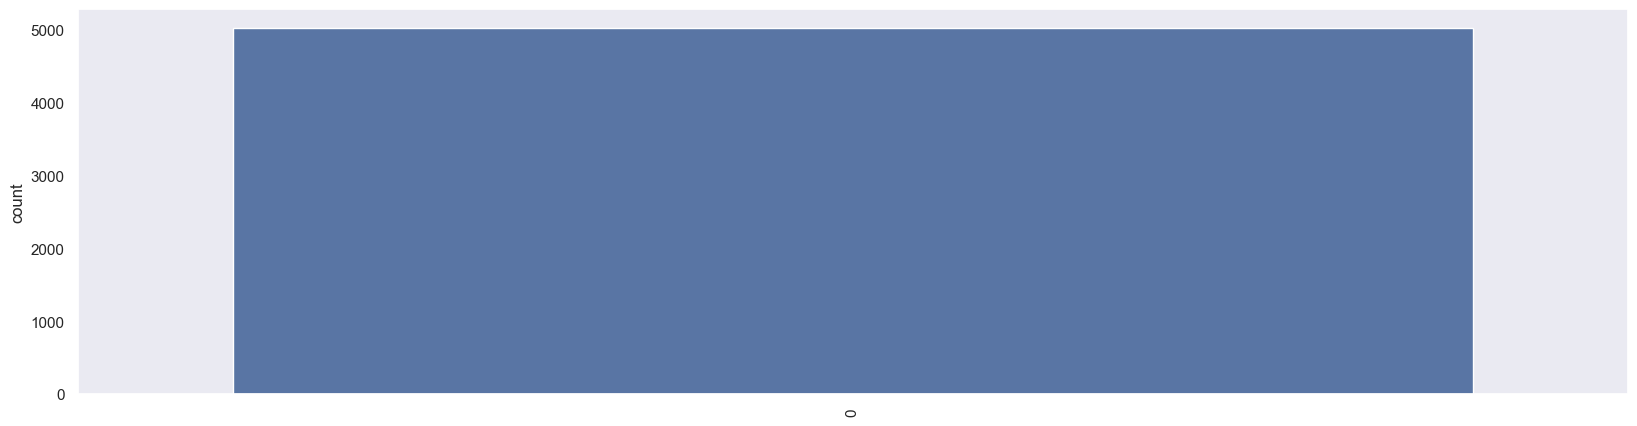

In [37]:
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.countplot(IMDB_df['Date'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

It shows that more movies and web series are released in 2021 (around 700+).

<Axes: xlabel='Rate', ylabel='Count'>

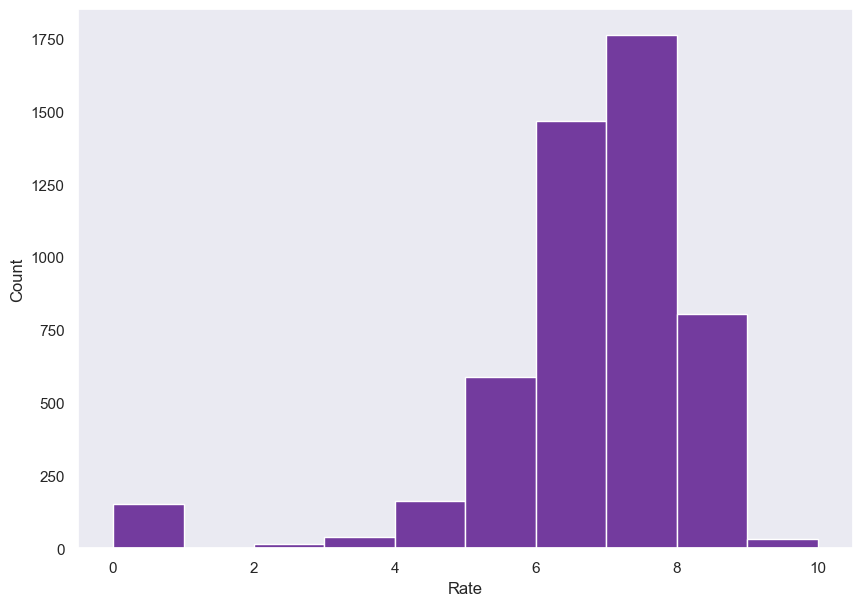

In [38]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=IMDB_df,x='Rate',color='indigo',binwidth=1)

Rating distribution for `IMDB_df` dataframe between 6 to 8.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'R'),
  Text(2, 0, 'TV-MA'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'PG'),
  Text(6, 0, 'TV-G'),
  Text(7, 0, '(Banned)'),
  Text(8, 0, 'Not Rated'),
  Text(9, 0, 'E'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, 'TV-Y7-FV'),
  Text(12, 0, 'TV-Y7'),
  Text(13, 0, 'Unrated'),
  Text(14, 0, 'Approved'),
  Text(15, 0, 'G'),
  Text(16, 0, 'TV-Y'),
  Text(17, 0, 'GP'),
  Text(18, 0, 'Passed'),
  Text(19, 0, 'M'),
  Text(20, 0, 'X'),
  Text(21, 0, 'M/PG')])

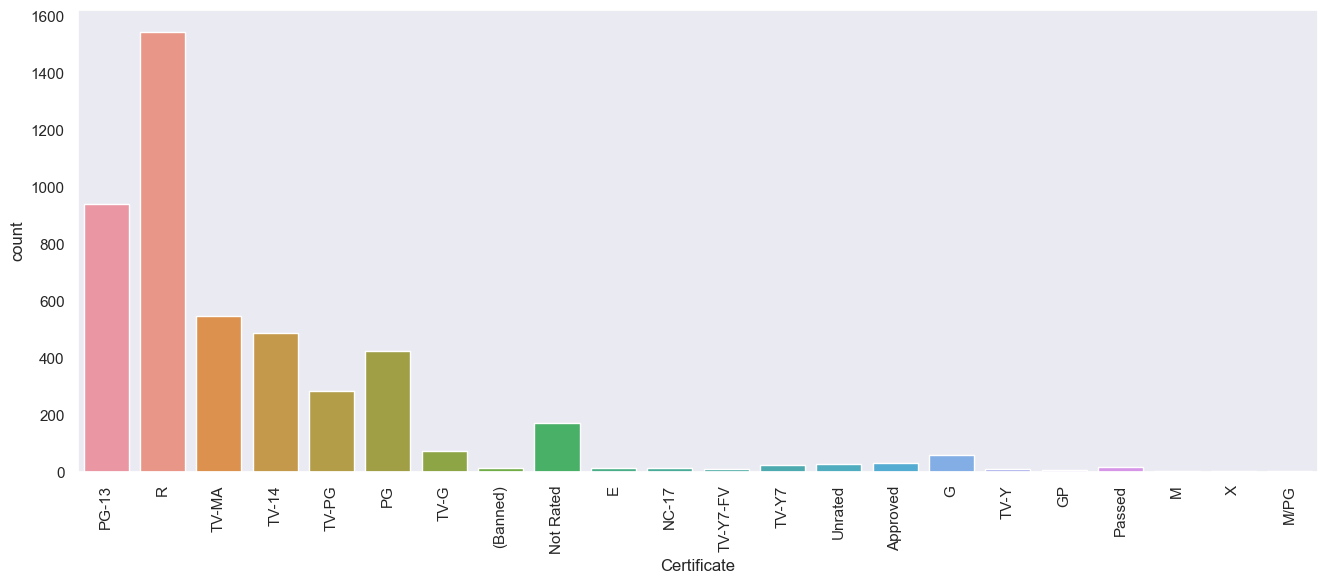

In [39]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x='Certificate', data=IMDB_df);
plt.xticks(rotation = 90)

By this we can see that more movies and web series were of certificate  `"R: Restricted. May be inappropriate for ages 17 and under".`

In [40]:
# Let's examin on PG-13 movie data.
PG13_Certificate = IMDB_df.loc[IMDB_df.Certificate=='PG-13'] 
PG13_Certificate

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
6,Free Guy,2021,7.3,153835.0,"Action, Adventure, Comedy",115.0,Film,PG-13,-,Mild,Moderate,Moderate,NaN,Mild
19,Black Widow,2021,6.8,246603.0,"Action, Adventure, Sci-Fi",134.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,Dumb and Dumber To,2014,5.6,133162.0,Comedy,109.0,Film,PG-13,-,Moderate,Mild,Moderate,Mild,Mild
5001,Alpha,2018,6.7,59238.0,"Action, Adventure, Drama",96.0,Film,PG-13,-,NaN,Mild,NaN,NaN,Moderate
5003,Tenki no ko,2019,7.5,31527.0,"Animation, Drama, Fantasy",112.0,Film,PG-13,-,Mild,Mild,Mild,Mild,Mild
5015,The Family Man,2000,6.8,106632.0,"Comedy, Drama, Fantasy",125.0,Film,PG-13,-,Mild,NaN,Mild,Mild,NaN


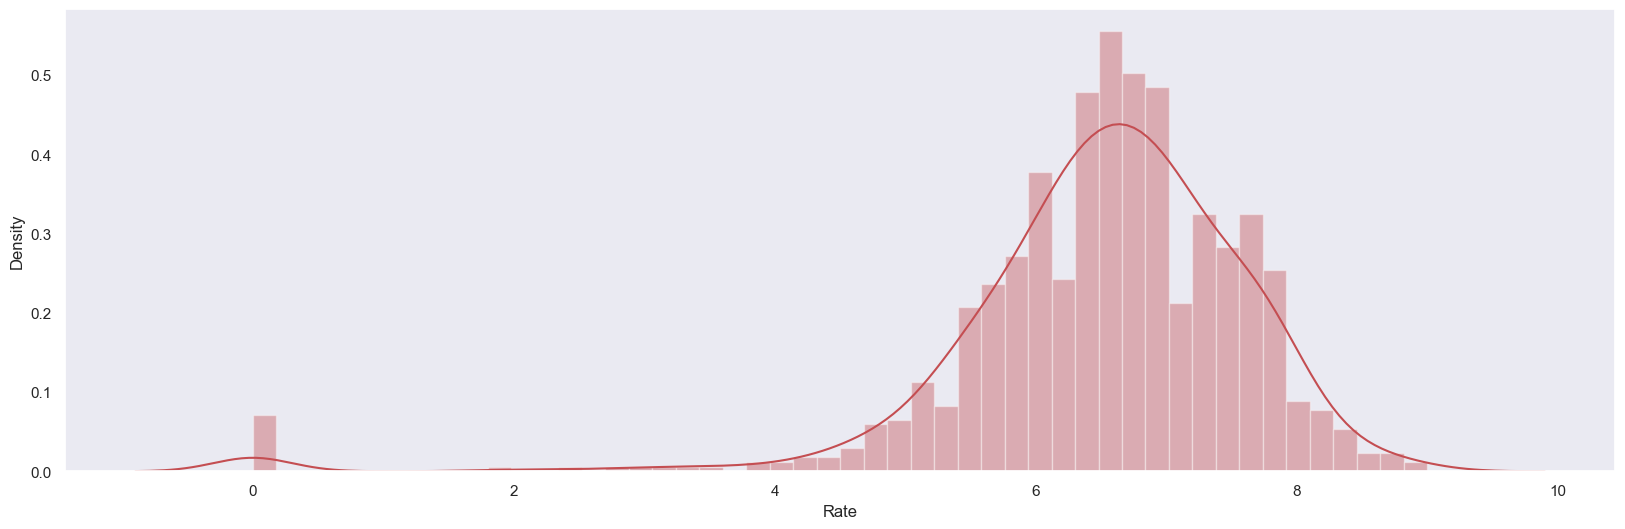

In [41]:
plt.figure(figsize=(20, 6))
plot = sns.distplot(PG13_Certificate['Rate'], color='r', bins=50)

By the above plot, we can see that the Rating of `PG13_Certificate` data are right skewed. Maximum films rated between 6 to 8.

# Let's do Bivariate / Multivariate Analysis.

Let's have a look at relation between "Rate" and "Votes" of `IMDB_df` dataframe.

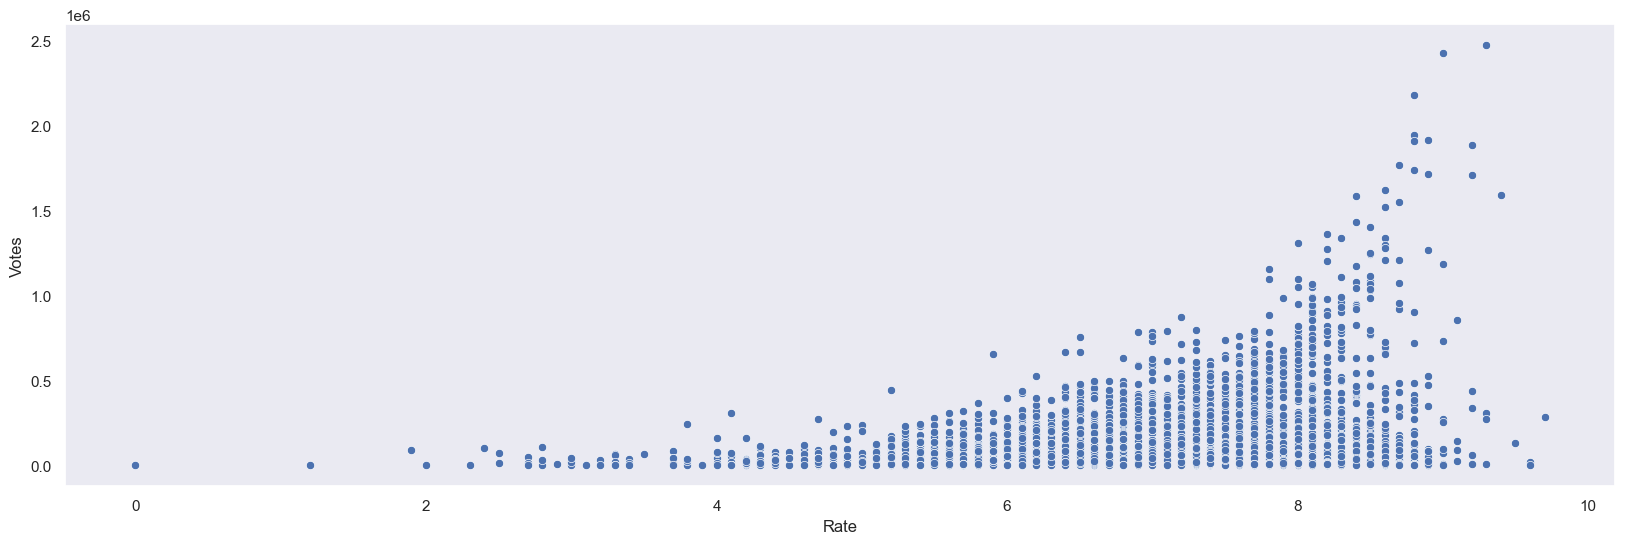

In [42]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=IMDB_df.Rate, y=IMDB_df.Votes);

By the above plot, we can say that the high rated movie or web series having more votes.

---
Now let's have look a at the heat map or correlation matrix on IMDB_df dataframe. Correlation is applied on numerical features of dataframe. By this we can understand the relation between pairwise numerical features. Here just ignore the `Date` feature.

---

In [43]:
correlations = IMDB_df.corr()

ValueError: could not convert string to float: 'No Time to Die'

In [44]:
correlations

NameError: name 'correlations' is not defined

In [ ]:
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

The Heat map clearly shows that how closely `("Rate", "Votes")`,`("Rate", "Duration")`, and `("Votes", "Duration")` are related. 

Let's have a look at top 10 Films and Web series as per rating.

In [45]:
Top_Rated = IMDB_df.nlargest(10, 'Rate')
Top_Rated

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
1946,Aspirants,2004,9.7,286206.0,Drama,45.0,Series,NaN,5,No Rate,No Rate,No Rate,No Rate,No Rate
909,The Chosen,2007,9.6,21759.0,"Drama, History",54.0,Series,TV-PG,17,NaN,NaN,NaN,NaN,Mild
1754,Bluey,2005,9.6,4110.0,"Animation, Family",7.0,Series,TV-Y,147,NaN,NaN,NaN,NaN,NaN
2780,Scam 1992: The Harshad Mehta Story,2020,9.5,131914.0,"Biography, Crime, Drama",54.0,Series,TV-14,10,NaN,NaN,Mild,Mild,NaN
52,Breaking Bad,2021,9.4,1593305.0,"Crime, Drama, Thriller",49.0,Series,TV-MA,62,Mild,Severe,Moderate,Severe,Severe
109,The Wire,2021,9.3,306334.0,"Crime, Drama, Thriller",59.0,Series,TV-MA,60,Severe,Severe,Severe,Severe,Severe
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
500,Avatar: The Last Airbender,1974,9.3,273781.0,"Animation, Action, Adventure",23.0,Series,TV-Y7-FV,62,NaN,Mild,NaN,NaN,Moderate
819,Toma,2021,9.3,5562.0,"Biography, Drama, Music",140.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
13,The Sopranos,2021,9.2,340006.0,"Crime, Drama",55.0,Series,TV-MA,86,Severe,Severe,Severe,Severe,Severe


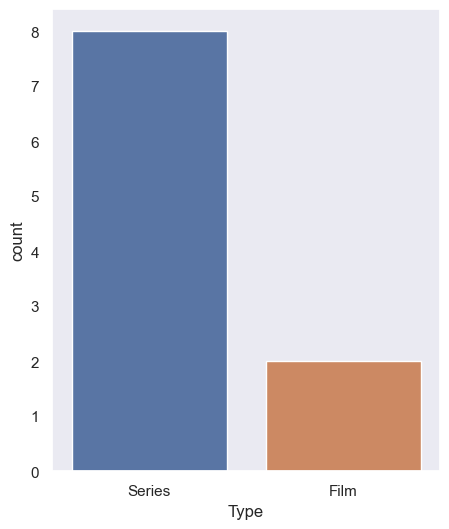

In [46]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='Type', data=Top_Rated)

From top 10 rated dataframe, majority are web series =8 and Films = 2 only. That is majority of people showing interest on web series. 

In [47]:
Top_Rated.loc[Top_Rated.Type=='Series']['Name']

1946                             Aspirants
909                             The Chosen
1754                                 Bluey
2780    Scam 1992: The Harshad Mehta Story
52                            Breaking Bad
109                               The Wire
500             Avatar: The Last Airbender
13                            The Sopranos
Name: Name, dtype: object

In [48]:
Top_Rated.loc[Top_Rated.Type=='Film']['Name']

201    The Shawshank Redemption
819                        Toma
Name: Name, dtype: object

Like this we can get some insights on the data by doing EDA. By this we  can understood that, how the data beheaving? and how the features are releated to each other? and many more.

<center><h1> Happy Learning